# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Your code here
boston = pd.read_csv("../data/boston_data.csv")

In [4]:
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873  4.0  305.0   
1  0.10328  25.0   5.13   0.0  0.453  5.927  47.2  6.9320  8.0  284.0   
2  0.34940   0.0   9.90   0.0  0.544  5.972  76.7  3.1025  4.0  304.0   
3  2.73397   0.0  19.58   0.0  0.871  5.597  94.9  1.5257  5.0  403.0   
4  0.04337  21.0   5.64   0.0  0.439  6.115  63.0  6.8147  4.0  243.0   

   ptratio   black  lstat  medv  
0     19.2  376.94   9.88  21.7  
1     19.7  396.90   9.22  19.6  
2     18.4  396.24   9.97  20.3  
3     14.7  351.85  21.45  15.4  
4     16.8  393.97   9.43  20.5

In [5]:
boston.describe()

crim          zn       indus        chas         nox         rm  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.00000   
mean     3.730912   10.509901   11.189901    0.069307    0.556710    6.30145   
std      8.943922   22.053733    6.814909    0.254290    0.117321    0.67583   
min      0.006320    0.000000    0.460000    0.000000    0.392000    3.56100   
25%      0.082382    0.000000    5.190000    0.000000    0.453000    5.90275   
50%      0.253715    0.000000    9.795000    0.000000    0.538000    6.23050   
75%      4.053158   12.500000   18.100000    0.000000    0.631000    6.62925   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.78000   

              age         dis         rad         tax     ptratio       black  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.601733    3.799666    9.836634  411.688119   18.444554  355.068243   
std     28.066143    2.109916    8.834741  171.073553    2.150295   94.489572   
min      2.900000    1.169100    1.000000  187.000000   12.600000    0.320000   
25%     45.800000    2.087875    4.000000  281.000000   17.375000  374.710000   
50%     76.600000    3.207450    5.000000  330.000000   19.000000  391.065000   
75%     94.150000    5.222125   24.000000  666.000000   20.200000  396.007500   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  404.000000  404.000000  
mean    12.598936   22.312376  
std      6.925173    8.837019  
min      1.730000    5.000000  
25%      7.135000   17.100000  
50%     11.265000   21.400000  
75%     16.910000   25.000000  
max     34.370000   50.000000

In [6]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
boston = boston.drop(columns=["chas","dis","zn","black","age"])


In [8]:
#outliers

z_scores = stats.zscore(boston)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
boston = boston[filtered_entries]

In [9]:
boston

crim  indus    nox     rm   rad    tax  ptratio  lstat  medv
0    0.15876  10.81  0.413  5.961   4.0  305.0     19.2   9.88  21.7
1    0.10328   5.13  0.453  5.927   8.0  284.0     19.7   9.22  19.6
2    0.34940   9.90  0.544  5.972   4.0  304.0     18.4   9.97  20.3
3    2.73397  19.58  0.871  5.597   5.0  403.0     14.7  21.45  15.4
4    0.04337   5.64  0.439  6.115   4.0  243.0     16.8   9.43  20.5
..       ...    ...    ...    ...   ...    ...      ...    ...   ...
397  0.10084  10.01  0.547  6.715   6.0  432.0     17.8  10.16  22.8
398  0.67191   8.14  0.538  5.813   4.0  307.0     21.0  14.81  16.6
399  9.32909  18.10  0.713  6.185  24.0  666.0     20.2  18.13  14.1
402  0.02055   0.74  0.410  6.383   2.0  313.0     17.3   5.77  24.7
403  0.08244   4.93  0.428  6.481   6.0  300.0     16.6   6.36  23.7

[378 rows x 9 columns]

In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 403
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     378 non-null    float64
 1   indus    378 non-null    float64
 2   nox      378 non-null    float64
 3   rm       378 non-null    float64
 4   rad      378 non-null    float64
 5   tax      378 non-null    float64
 6   ptratio  378 non-null    float64
 7   lstat    378 non-null    float64
 8   medv     378 non-null    float64
dtypes: float64(9)
memory usage: 29.5 KB


### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

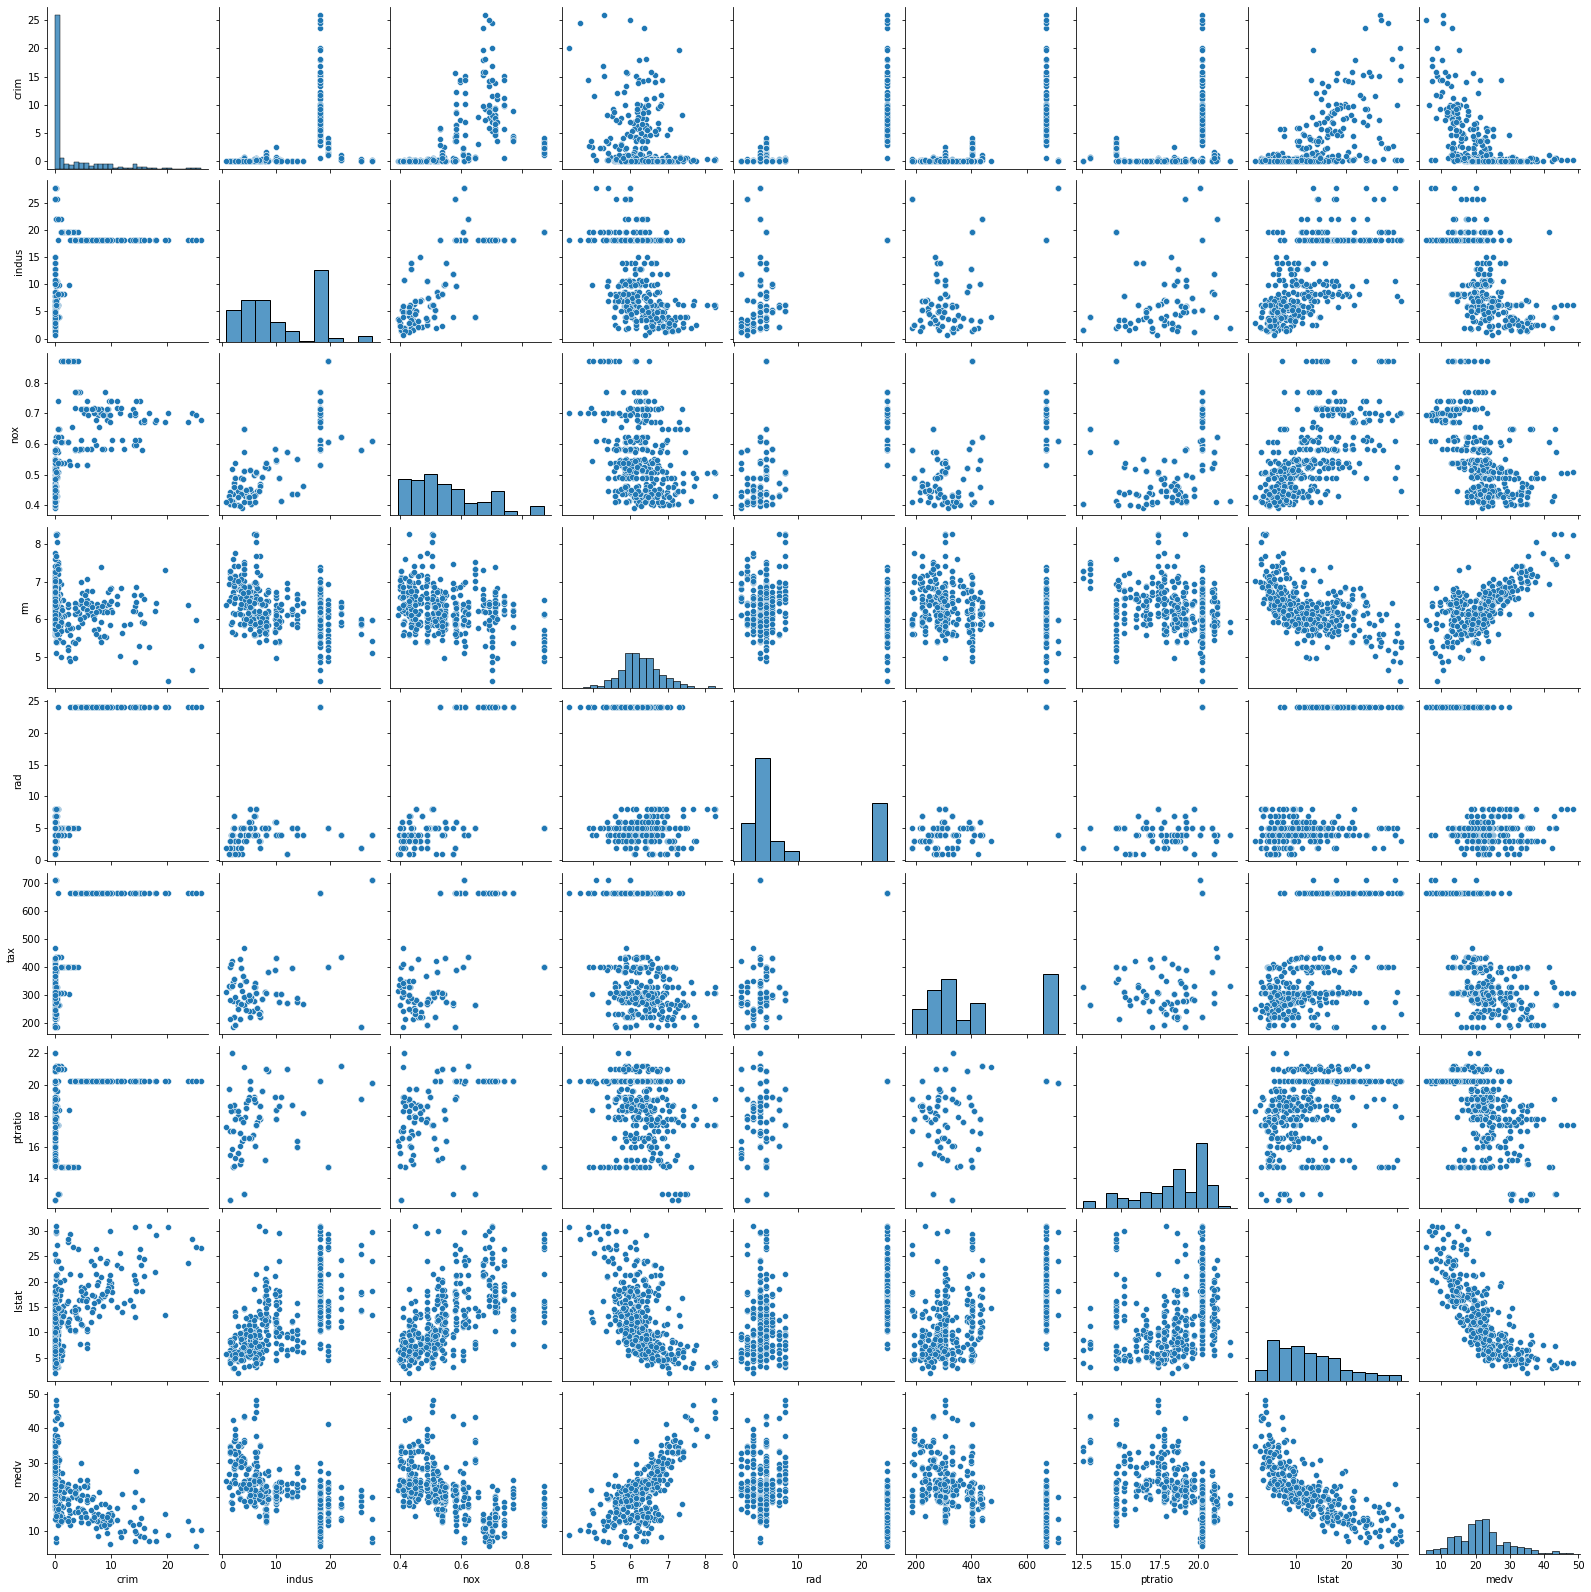

In [11]:
sns.pairplot(boston)


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [13]:
# Your response here


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

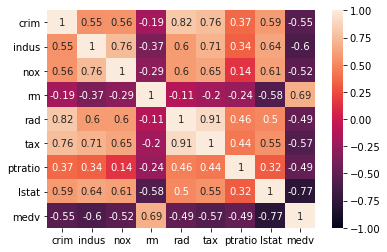

In [12]:
sns.heatmap(boston.corr(),vmin=-1, vmax=1,annot=True) # "rad" and "tax" have a high correlation.


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [13]:
boston['medv'].describe()


count    378.000000
mean      21.688360
std        7.302038
min        5.600000
25%       17.225000
50%       21.300000
75%       24.700000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [21]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true,y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [22]:
# Your code here
from sklearn.model_selection import train_test_split



In [23]:
from sklearn.model_selection import train_test_split

X = boston.drop(columns="medv")
y = boston["medv"]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Your code here


In [25]:
max_depth = [2, 4, 6, 8, 10]
r2_train = [] 
r2_test = []

for i in max_depth:
    mod1 = RandomForestRegressor(max_depth=i)
    mod1.fit(X_train, y_train)
    y_pred = mod1.predict(X_train)
    y_test_pred = mod1.predict(X_test)
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_test_pred))
    print(f'Max depth =',i,' R2 training set: ',r2_score(y_train, y_pred),' R2 test set: ',r2_score(y_test, y_test_pred))

Max depth = 2  R2 training set:  0.7909997885555506  R2 test set:  0.733918150227566
Max depth = 4  R2 training set:  0.8998044217055383  R2 test set:  0.8081839808368949
Max depth = 6  R2 training set:  0.9482571245272507  R2 test set:  0.8226154104016397
Max depth = 8  R2 training set:  0.9684881459884799  R2 test set:  0.8268896291436375
Max depth = 10  R2 training set:  0.9741161229158798  R2 test set:  0.829781362491778


Now, plot the score for each tree on the training set and on the testing set.

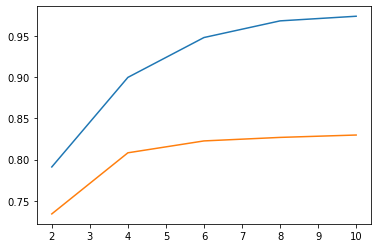

In [26]:
plt.plot(max_depth, r2_train)
plt.plot(max_depth, r2_test)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

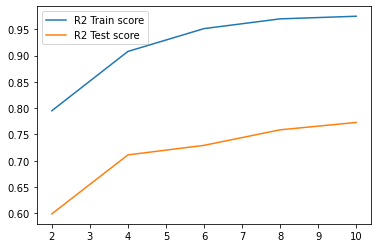

In [79]:
# Produce a plot with the score for the testing and training for the different max depths


In [ ]:
# Your response here


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [27]:
max_depth = [1, 10]
r2_train = [] 
r2_test = []

for i in max_depth:
    mod1 = RandomForestRegressor(max_depth=i)
    mod1.fit(X_train, y_train)
    y_pred = mod1.predict(X_train)
    y_test_pred = mod1.predict(X_test)
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_test_pred))
    print(f'Max depth =',i,' R2 training set: ',r2_score(y_train, y_pred),' R2 test set: ',r2_score(y_test, y_test_pred))

Max depth = 1  R2 training set:  0.5721281639342892  R2 test set:  0.5132321970030986
Max depth = 10  R2 training set:  0.9733338406207253  R2 test set:  0.8308633752440653


In [ ]:
# Your response here


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# 1978 --> too old --> not relevant
#
#model not robust enough
#no rural and city have too much of a difference to apply the same data